## Non-Positional Encodings for Third Variables

There are four major cases to consider when we want to plot three variables together:

- three numeric variables
- two numeric variables and one categorical variable
- one numeric variable and two categorical variables
- three categorical variables

If we have at least two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical. (You will see additional techniques later in the lesson that can also be applied to the other two cases, i.e. where we have at least two categorical variables.)

Three main non-positional encodings stand out: shape, size, and color. For Matplotlib and Seaborn, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next page in the lesson.

When the third variable is 
- categorical: [shape](#shape)
- quantitative: [size](#size)
- categorical or quantitative: [color](#color)

In addition
- [Additional plot practices](#additional): facetgrid, pointplot/boxplot/barplot, heatmap
- [Plot Matrices](#matrices)

### Set-up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [5]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [6]:
fuel_econ.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [14]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(categories = sedan_classes, ordered = True)  

fuel_econ.VClass = fuel_econ.VClass.astype(vclasses)
fuel_econ['trans_types'] = fuel_econ.trans.apply(lambda x: x.split()[0])

---
<a id ='shape'></a>
### `1.` Encoding via Shape
Shape is a good encoding for **categorical variables**, using one shape for each level of the categorical variable. 

**Unfortunately**, there is no built-in way to automatically assign different shapes in a single call of the scatter or regplot function. Instead, we need to write a loop to call our plotting function multiple times, isolating data points by categorical level and setting a different "marker" argument value for each one.

In [15]:
fuel_econ.shape[0]

3929

#### For the sake of this lecture, we just use subset of 3929 dataset

In [17]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], size = 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

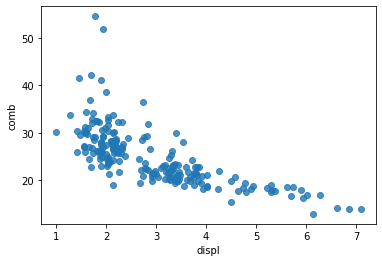

In [21]:
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', fit_reg = False,
            x_jitter = 0.4);

#### We want plotting 'trans_types' as the third variable

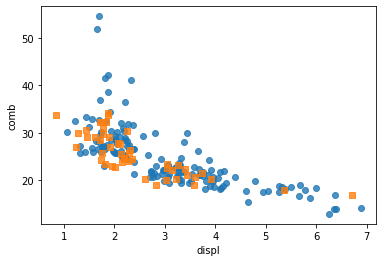

In [27]:
ttypes_markers = [['Automatic', 'o'], 
                  ['Manual', 's']]

for ttype, marker in ttypes_markers:
    plot_data = fuel_econ_subset[fuel_econ_subset['trans_types'] == ttype]
    sns.regplot(data = plot_data, x = 'displ', y = 'comb', fit_reg = False,
            x_jitter = 0.4, marker = marker);

<a id ='size'></a>
### `2` Encoding via Size
Point size is a good encoding for **numeric variables**

Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the "s" parameter in scatter. (You need to refer to "s" through a dictionary assigned to the "scatter_kws" parameter when working with regplot.)

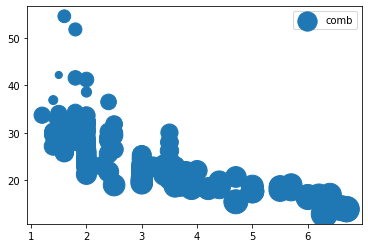

In [36]:
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb',
            s = 'co2');
plt.legend();

In [35]:
fuel_econ_subset.co2.describe()

count    200.000000
mean     373.740000
std       91.842406
min       51.000000
25%      316.000000
50%      365.500000
75%      429.250000
max      692.000000
Name: co2, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


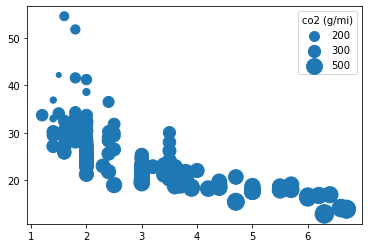

In [116]:
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb',
            s = fuel_econ_subset['co2'] / 2); # scaled down by half

size = [200, 300, 500]
base_color = sns.color_palette()[0]
legend_obj = []

for s in size:
    legend_obj.append(plt.scatter([],[], s = s / 2, c = base_color)) # scaled down by half
    
plt.legend(legend_obj, size, title = 'co2 (g/mi)');

While the creation of the plot is easier with size, we need to put in **extra leg work to create a legend**. 

Since, as noted above, legend will only create one legend entry per plot function call, we need to create additional dummy scatter objects with reference sizes to create the plot. The color is fixed so that all of the legend entries have the same color, and two arguments are provided to the legend function: the list of plotting objects to depict in the legend, and their labels.

#### Still, the above graph with Matplotlib's scatter does not look informationl enough
#### Let's try with `regplot`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


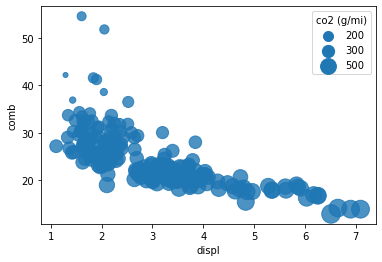

In [115]:
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
            scatter_kws = {'s': fuel_econ_subset['co2'] / 2}, # scaled down by half
            x_jitter = 0.4, fit_reg = False);

size = [200, 300, 500]
base_color = sns.color_palette()[0]
legend_obj = []

for s in size:
    legend_obj.append(plt.scatter([],[], s = s/2, c = base_color)) # scaled down by half
    
plt.legend(legend_obj, size, title = 'co2 (g/mi)');

### A Warning on Combining Encodings
It might seem plausible to combine both size and shape encodings into the same plot, to depict the trend in four variables at once. Technically, this may be true, but there are some cautions to be taken with this approach. One surface issue is that the code to depict the plot and a reasonable legend gets complicated. A more important issue is that point areas won't all be the same even with the same value, depending on the shape of the marker:

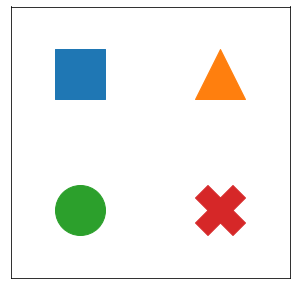

In [52]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker = 's', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([0],[0], marker = 'o', s = common_size)
plt.scatter([1],[0], marker = 'X', s = common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([]);

Despite having the same "s" values, the triangle, circle, and X markers all look smaller (have a smaller area) than the square. Perhaps this isn't a major concern, considering that size is better used as a qualitative measure for exploration. But it's still something to consider. A little more discussion of the number of variables that can be reasonably packed into a plot can be found later in the lesson ("How much is too much?").

Bloomberg: Tracking Super Bowl Ticket Prices - [This visualization]((https://www.bloomberg.com/graphics/infographics/tracking-super-bowl-ticket-prices.html)) shows an interesting encoding for a third variable: connecting points by a line to show the changes in the two axis values across time. A different marker at each end of the path shows the starting point and the end point.

---
<a id ='color'></a>
### `3`. Encoding via Color
Color is a very common encoding for variables, for both qualitative and quantitative variables. You've already seen this employed in previous lessons where position could not be used to encode a value: color for category in a clustered bar chart, and color for count in a heat map (both as a 2-d histogram and as a 2-d bar chart). Here, we'll look at how to employ color in scatterplots, as well as discuss more about color palette choices depending on the type of data you have.

#### If you have a `qualitative variable`, 

#### you can set different colors for different levels of a categorical variable through the `hue` parameter on seaborn's `FacetGrid` class.

In [62]:
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', 
            x_jitter = 0.4, fit_reg = False,
            hue = fuel_econ_subset['trans_types']); # no hue parameter

TypeError: regplot() got an unexpected keyword argument 'hue'

/Users/jsuk/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


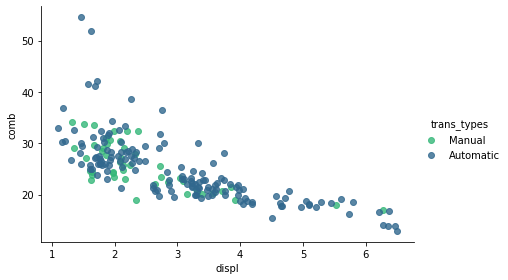

In [80]:
g = sns.FacetGrid(data = fuel_econ_subset, hue = 'trans_types', 
                  size = 4, aspect = 1.5, palette = 'viridis_r');
g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.4, fit_reg = False) # plt.scatter can do
g.add_legend();

#### For quantitative variables, we should not take the same approach, since FacetGrid expects any variable input for subsetting to be categorical. 

Instead, we can set color based on numeric value in the `scatter` function through the "c" parameter, much like how we set up marker sizes through "s". (Unlike with size, we don't have an easy way of setting color by numeric value through regplot due to how its "color" argument is set up.)

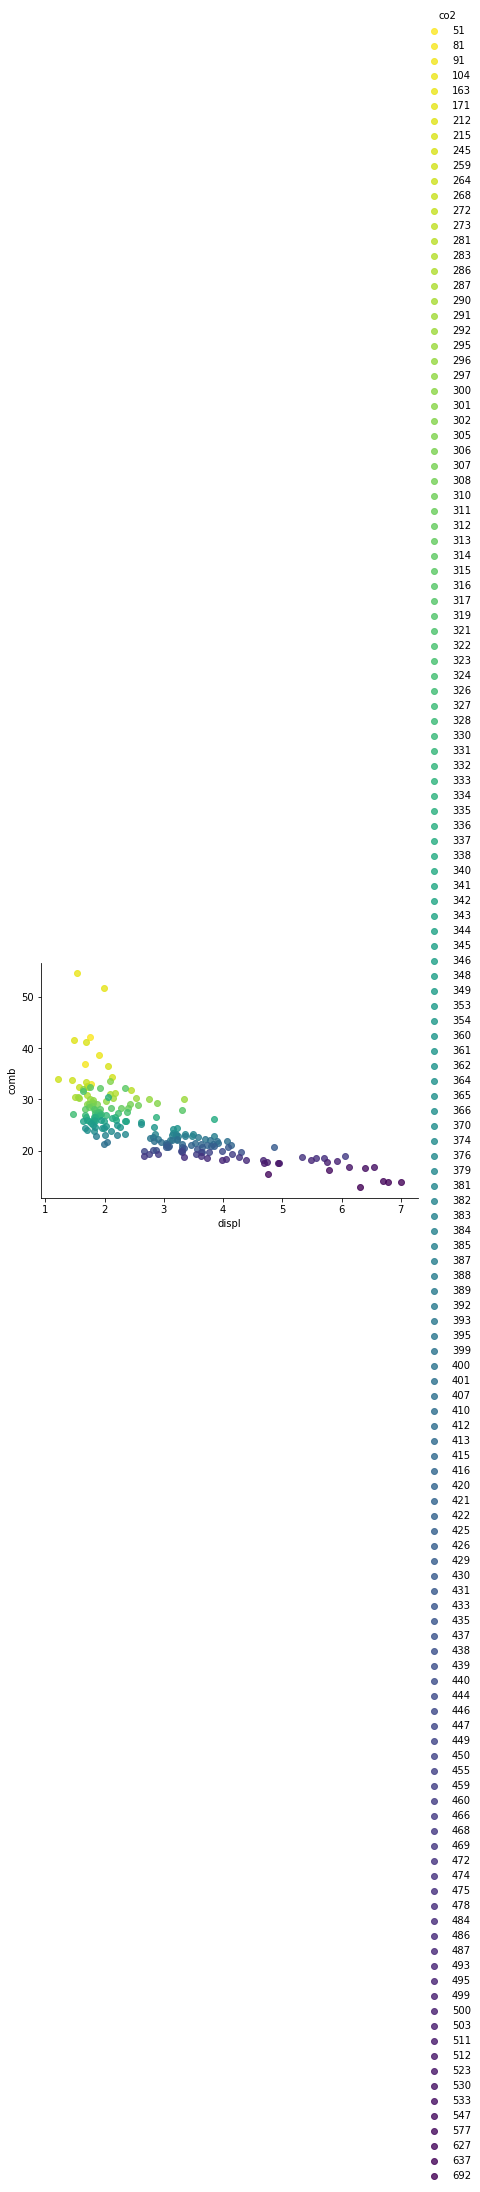

In [87]:
g = sns.FacetGrid(data = fuel_econ_subset, hue = 'co2', 
                  size = 4, aspect = 1.5, palette = 'viridis_r');
g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.4, fit_reg = False) # plt.scatter can do
g.add_legend();

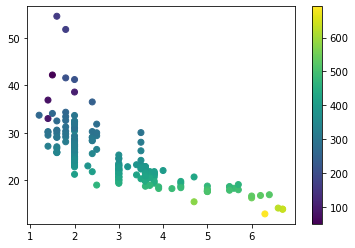

In [85]:
#best
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2');
plt.colorbar();

ValueError: Invalid RGBA argument: 'co2'

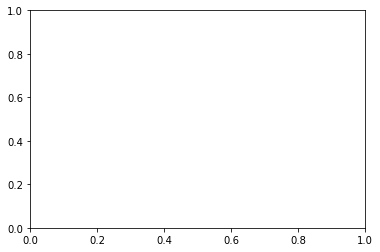

In [82]:
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', color = 'co2');

### Useful information: Color Palette

Depending on the type of data you have, you may want to change the type of color palette that you use to depict your data. There are three major classes of color palette to consider: qualitative, sequential, and diverging.

#### Qualitative palettes are built for nominal-type data. 
This is the palette class taken by the default palette.

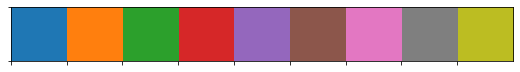

In [93]:
sns.palplot(sns.color_palette(n_colors=9))

In a qualitative palette, consecutive color values are distinct so that there is no inherent ordering of levels implied. Colors in a good qualitative palette should also try and avoid drastic changes in brightness and saturation that would cause a reader to interpret one category as being more important than the others - unless that emphasis is deliberate and purposeful.

#### For other types of data (ordinal and numeric), a choice may need to be made between a sequential scale and a diverging scale. 

**In a sequential palette,** consecutive color values should follow each other systematically. Typically, this follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values. 

The default sequential color map, "viridis", takes the opposite approach, with dark colors indicating low values, and light values indicating high.

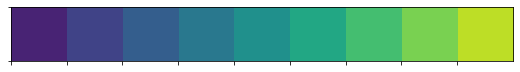

In [95]:
sns.palplot(sns.color_palette('viridis', 9))

Most of the time, a sequential palette will depict ordinal or numeric data just fine. However, if there is **a meaningful zero or center value** for the variable, you may want to consider using a diverging palette. 

**In a diverging palette,** two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

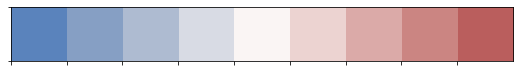

In [96]:
sns.palplot(sns.color_palette('vlag', 9))

### Selecting Color Palettes
If you want to change the color map for your plot, the easiest way of doing so is by using one of the built-ins from Matplotlib or Seaborn. [This part](https://matplotlib.org/api/pyplot_summary.html#colors-in-matplotlib) of the Matplotlib documentation has a list of strings that can be understood for color mappings. For most of your purposes, stick with the palettes noted in the top few tables as built-in for Matplotlib ('viridis', etc.) or from ColorBrewer; the remaining palettes may not be as perceptually consistent. Seaborn also adds in a number of its own palettes:

- Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
- Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
- Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)

For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

A color palette can be set in FacetGrid through the "palette" parameter, and in scatter through the "cmap" parameter.



For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

A color palette can be set in FacetGrid through the **`"palette" parameter`**, and in scatter through the "cmap" parameter.

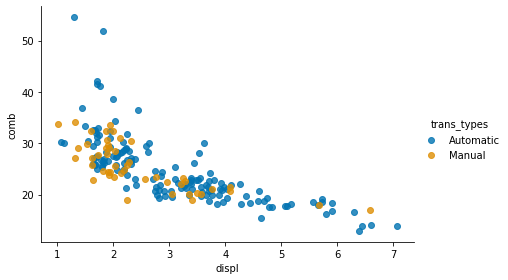

In [104]:
g = sns.FacetGrid(data = fuel_econ_subset, 
                  hue = 'trans_types', hue_order = ['Automatic','Manual'],
                  size = 4, aspect = 1.5,
                  palette = 'colorblind');
g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.4, fit_reg = False)
g.add_legend();

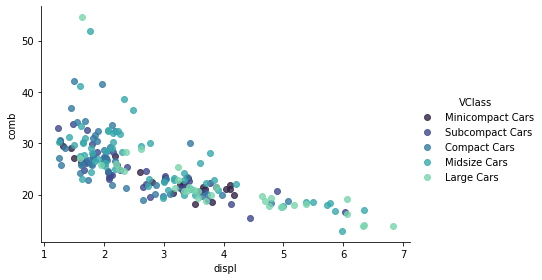

In [101]:
g = sns.FacetGrid(data = fuel_econ_subset, hue = 'VClass', 
                  size = 4, aspect = 1.5,
                  palette = 'mako');
g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.4, fit_reg = False)
g.add_legend();

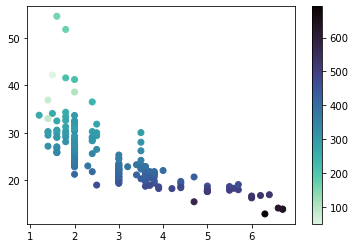

In [110]:
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb',
            c = 'co2', cmap = 'mako_r'); #cmap instead # to give 'dark' to higher value
plt.colorbar(); 

When using a diverging color palette, you will likely need to specify the **"vmin" and "vmax" parameters** in order to have the neutral point in the palette meet the center point in the scale. 

Alternatively, solutions that create a different normalization function like the one posted in [this Stack Overflow thread](https://stackoverflow.com/questions/20144529/shifted-colorbar-matplotlib) can be used for finer control over the color map. Diverging color scales are common enough for the heatmap type that there is a "center" parameter for setting the central value. You'll see a demonstration of this later in the lesson ("Plot Matrices").

### Warnings on Color
There are a couple of things to be aware of in general, when working with color. First of all, try and consider color blindness when selecting color for your plots. You don't want your visualization to shut out the 8% of the population that have some kind of color vision deficiency. Fortunately, the built-in color palettes highlighted in the previous section should minimize these concerns. If you use a different, or custom palette, it might be worth checking your visualization's interpretability through a color blindness sim like this one.

Secondly, you want to be aware of the effect of transparency and overlap on interpretability. If points of different color on a qualitative scale overlap, the result may be a third color that cannot be matched to something in the palette. If multiple points on a quantitative scale overlap, then the result may be a value that does not actually exist in the data. To be safe here, avoid or minimize transparency in plots with color. You may need to plot only a sample of your points in order to make sure that the effect of the third variable is clearly visible.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

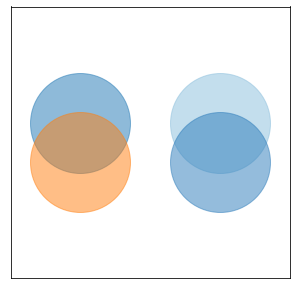

In [117]:
plt.figure(figsize = [5,5])

# left: qualitative points
plt.scatter(0,0.5,s = 1e4, c = sns.color_palette()[0], alpha = 0.5)
plt.scatter(0,-0.5,s = 1e4, c = sns.color_palette()[1], alpha = 0.5)

# right: quantitative points
plt.scatter(1,0.5,s = 1e4, c = sns.color_palette('Blues')[2], alpha = 0.5)
plt.scatter(1,-0.5,s = 1e4, c = sns.color_palette('Blues')[4], alpha = 0.5)

# set axes for point overlap
plt.xlim(-0.5,1.5)
plt.ylim(-3.5,3.5)
plt.xticks([])
plt.yticks([]);

### Further Reading
- Matplotlib tutorial: [Colormaps in Matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html)
- Seaborn tutorial: [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
- Eager Eyes: [How The Rainbow Color Map Misleads](https://eagereyes.org/basics/rainbow-color-map) - seaborn will refuse to accept the 'jet' palette string, which corresponds with a rainbow-colored palette that covers the entire range of hues. This, and the next link, will tell you why it's been forbidden.
- Agile Scientific: [No more rainbows!](https://agilescientific.com/blog/2017/12/14/no-more-rainbows)
- Datawrapper: [How to Choose a Color Palette for Choropleth Maps](https://blog.datawrapper.de/how-to-choose-a-color-palette-for-choropleth-maps/) - Though this article discusses color in the context of maps and for a specific software tool, it's a useful reference if you want to create a non-linear normalization function.

---
### Quiz

**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

In [118]:
df = pd.read_csv('pokemon.csv')

In [119]:
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


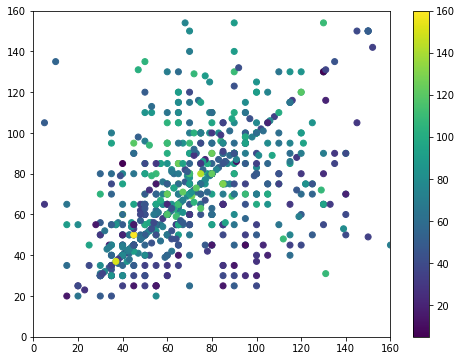

In [127]:
plt.figure(figsize = (8, 6))
plt.scatter(data = df, x = 'defense', y = 'special-defense',
            c = 'speed');
plt.colorbar();
plt.xlim((0,160));
plt.ylim((0,160));

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [129]:
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [128]:
type_cols = ['type_1','type_2']
non_type_cols = df.columns.difference(type_cols) # this is good to use!
pkmn_types = df.melt(id_vars = non_type_cols, value_vars = type_cols, 
                     var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [130]:
pkmn_types.type.value_counts()

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [132]:
subset = pkmn_types.query('type in ["fairy","dragon"]')

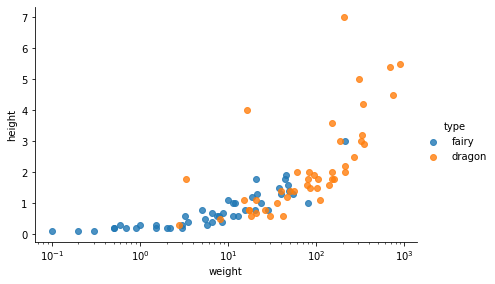

In [154]:
g = sns.FacetGrid(data = subset, hue = 'type', size = 4, aspect = 1.5)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g = g.map(sns.regplot, 'weight', 'height', fit_reg = False).set(xscale = 'log', xticks = ticks);
g.add_legend();

---
<a id = 'additional'></a>
## Additional plot practices

### Faceting in two directions

In the previous lesson, you saw how FacetGrid could be used to subset your dataset across levels of a categorical variable, and then create one plot for each subset. Where the faceted plots demonstrated were univariate before, you can actually use any plot type, allowing you to facet bivariate plots to create a multivariate visualization.

FacetGrid also allows for faceting a variable not just by columns, but **also by rows**. We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends.

Setting **margin_titles = True** means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.

In [6]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [7]:
fuel_econ.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [11]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd.api.types.CategoricalDtype(categories = sedan_classes, ordered = True)
fuel_econ['trans_type'] = fuel_econ.trans.apply(lambda x: x.split()[0]) 

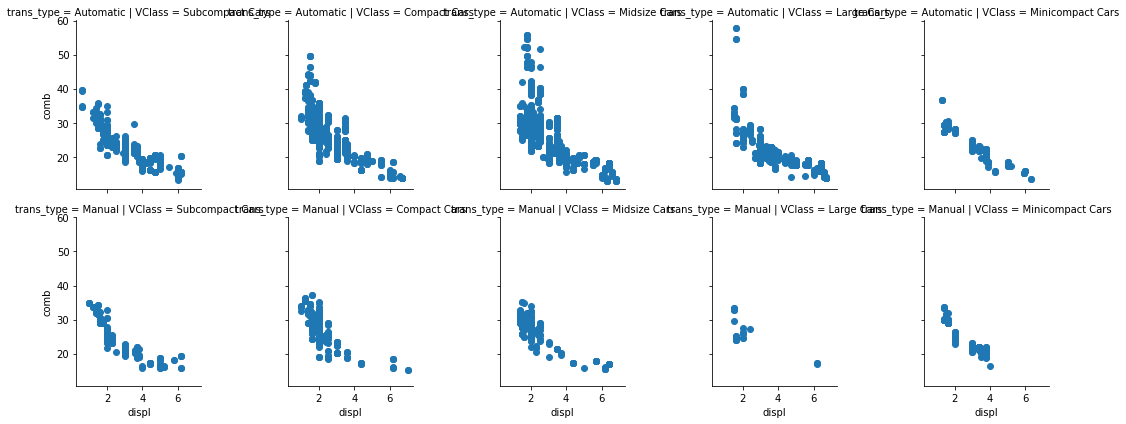

In [12]:
g = sns.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type')
g.map(plt.scatter, 'displ', 'comb');

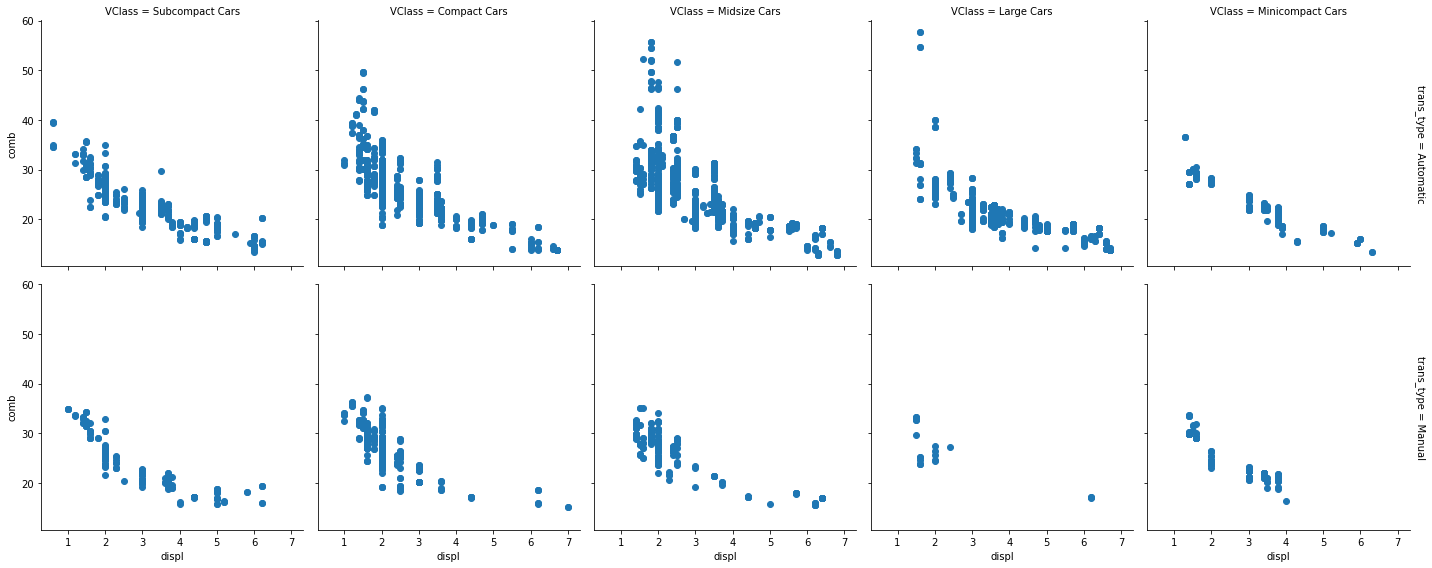

In [13]:
g = sns.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type',
                  size = 4, aspect = 1, margin_titles = True)
g.map(plt.scatter, 'displ', 'comb');

---
### Other Adaptations of Bivariate Plots

You also saw one other way of expanding univariate plots into bivariate plots in the previous lesson: substituting count on a bar chart or histogram for the mean, median, or some other statistic of a second variable. This adaptation can also be done for bivariate plots like the heat map, clustered bar chart, and line plot, to allow them to depict multivariate relationships.

If we want to depict the mean of a **third variable** in a **`2-d histogram`**, we need to **change the weights** of points in the hist2d function similar to how we changed the weights in the 1-d histogram.

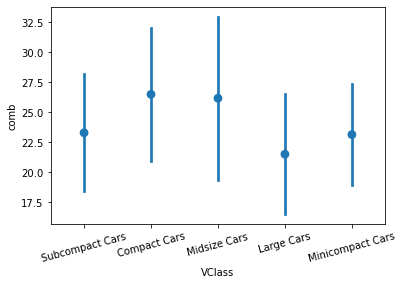

In [20]:
sns.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = '');
plt.xticks(rotation = 15);

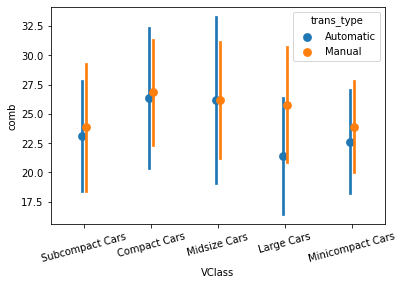

In [23]:
sns.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', 
              hue = 'trans_type', dodge = True,
              ci = 'sd', linestyles = '');
plt.xticks(rotation = 15);

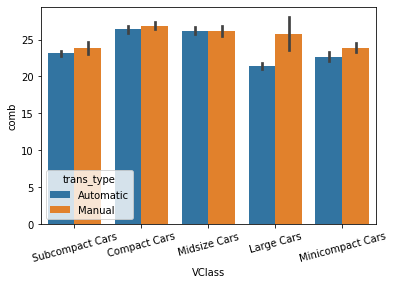

In [25]:
# same for barplot and boxplot
sns.barplot(data = fuel_econ, x = 'VClass', y = 'comb', 
              hue = 'trans_type');
plt.xticks(rotation = 15);

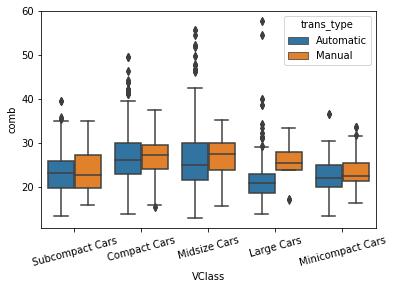

In [26]:
# same for barplot and boxplot
sns.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', 
              hue = 'trans_type');
plt.xticks(rotation = 15);

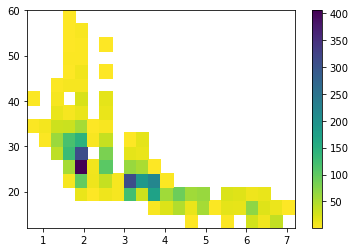

In [29]:
# heatmap
x_bins = np.arange(0.6, 7 + 0.3, 0.3)
y_bins = np.arange(12, 58 + 3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', 
           cmap = 'viridis_r', cmin = 0.5, 
           bins = [x_bins, y_bins]);
plt.colorbar();

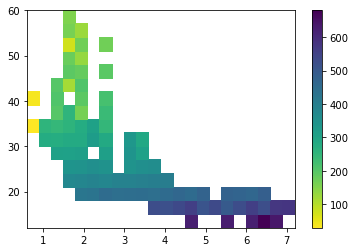

In [54]:
# adding weights to plot average co2 put instead
x_bins = np.arange(0.6, 7 + 0.3, 0.3)
y_bins = np.arange(12, 58 + 3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', 
           cmap = 'viridis_r', cmin = 0.5, 
           bins = [x_bins, y_bins],
           weights = co2_weights); # how much each point is worth in aggregation
plt.colorbar();

In [52]:
# so we make each point to be average
displ_bins = pd.cut(x = fuel_econ['displ'], bins = x_bins, right = False, include_lowest = False,
                    labels = False).astype(int)
comb_bins = pd.cut(x = fuel_econ['comb'], bins = y_bins, right = False, include_lowest = False,
                   labels = False).astype(int)

n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values

co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

In [33]:
displ_bins

0       10
1        4
2       10
3       10
4        6
        ..
3924     4
3925     4
3926     4
3927     9
3928     9
Name: displ, Length: 3929, dtype: int64

In [45]:
n_points

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,   3.,  nan,   3.,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   4.,   8.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  42.,  62.,  31.,  15.,   7.,   4.,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,   6.,  55., 130., 119.,  34.,   7.,  nan,   7.,
          2.,   4.,   1.,   2.,   2.],
       [ nan,  nan,  15.,  98., 405., 311., 145.,  55.,  14.,  26.,   6.,
         10.,   3.,   3.,   5.,  nan],
       [ nan,  nan,   1.,  12.,   9.,  nan,   5.,   1.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  11.,  37., 105.,  82.,  37.,   5.,  15.,  17.,  nan,
          1.,  nan,   1.,  nan,  nan],
       [ nan,  nan,   7.,   6.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan, 123., 311.,  64.,  17.,   2.,  nan,  nan,  nan,  nan,
         nan,  nan,  n

In [48]:
c02_weights

0        2.722543
1        0.861728
2        2.479769
3        2.578035
4        3.780488
          ...    
3924    15.600000
3925     8.346154
3926    35.333333
3927     2.036842
3928     2.194737
Name: co2, Length: 3929, dtype: float64

---
<a id = 'matrices'></a>
## Plot matrices

To move back to bivariate exploration for a bit, you might come out of your initial univariate investigation of the data wanting to look at the relationship between many pairs of variables. 

**Rather than generate these bivariate plots one by one**, a preliminary option you might consider for exploration is the creation of a plot matrix. In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

**Seaborn's `PairGrid`** class facilitates the creation of this kind of plot matrix.

By **default**, PairGrid only **expects to depict numeric variables**; a typical invocation of PairGrid plots the same variables on the horizontal and vertical axes. 

- On the diagonals, where the row and column variables match, a histogram is plotted. 
- Off the diagonals, a scatterplot between the two variables is created.

The pairplot function can also be used to render this common use case in a single call.

For other relationships, the flexibility of PairGrid shines. For example, if we want to look at the relationship between the numeric and categorical variables in the data, we need to set the different variable types on the rows and columns, then use an appropriate plot type for all matrix cells.

When you choose to create a plot matrix, be aware that the time it takes to render the plot depends on the number of data points you have and the number of variables you want to plot. Increasing the number of variables increases the number of plots that need to be rendered in a quadratic fashion. 

In addition, increasing the number of variables means that the individual subplot size needs to be reduced in order to fit the matrix width on your screen. That means that, if you have a lot of data, it might be difficult to see the relationships between variables due to overplotting, and it will take a long time to complete. 

One recommended approach is to take a random subset of the data to plot in the plot matrix instead. Use the plot matrix to identify interesting variable pairs, and then follow it up with individual plots on the full data.


### Correlation Matrices
For **numeric variables**, it can be useful to create a **correlation matrix** as part of your exploration. While it's true that the .corr function is perfectly fine for computing and returning a matrix of correlation coefficients, it's not too much trouble to plot the matrix as a **`heat map`** to make it easier to see the strength of the relationships.

In [56]:
df = pd.read_csv('pokemon.csv')

In [57]:
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [65]:
pokm_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']

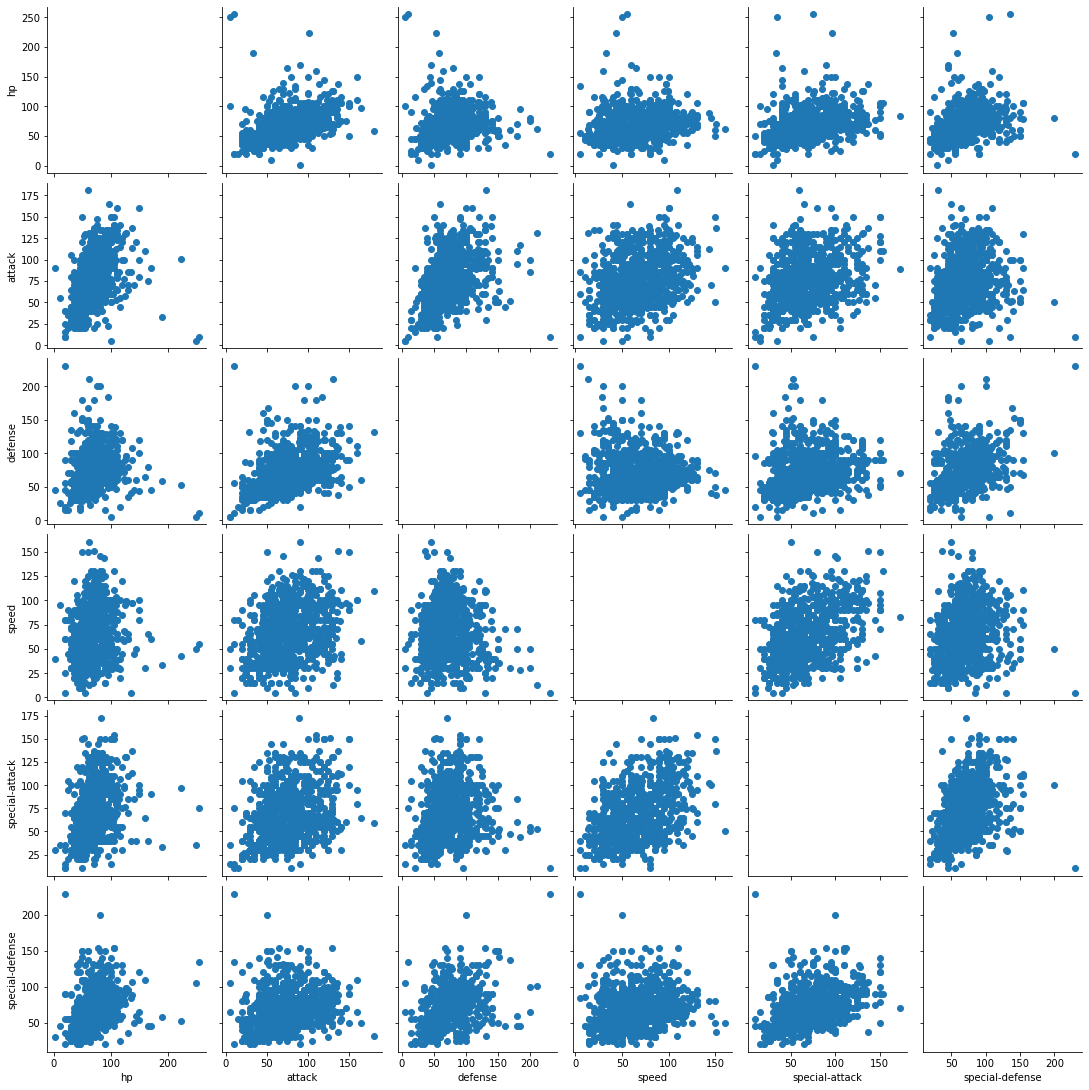

In [75]:
g = sns.PairGrid(data = df, vars = pokm_stats);
# g.map(plt.scatter);
g = g.map_offdiag(plt.scatter);
#g.map_diag(plt.hist); # to make the univrate plots (in diagonal) as histgram

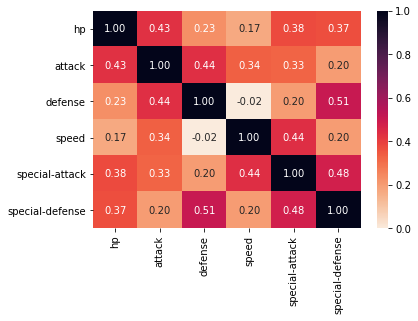

In [83]:
sns.heatmap(df[pokm_stats].corr(), cmap = 'rocket_r', 
            annot = True, fmt = '.2f', vmin = 0);

### Feature engineering

In [85]:
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [87]:
df['att_ratio'] = df['attack'] / df['special-attack']
df['def_ratio'] = df['defense'] / df['special-defense']

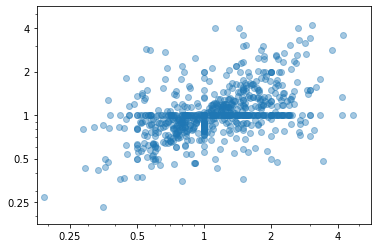

In [97]:
plt.scatter(data = df, x = 'att_ratio', y = 'def_ratio', alpha = 0.4);
plt.xscale('log')
plt.yscale('log')# changed to log scale
log_ticks = [0.25, 0.5, 1, 2, 4]
plt.xticks(log_ticks, log_ticks)
plt.yticks(log_ticks, log_ticks)
plt.xlim(2 ** -2.5, 2 ** 2.5); # removing outliers
plt.ylim(2 ** -2.5, 2 ** 2.5);

This is not so much an additional technique for adding variables to your plot, but a reminder that feature engineering is a tool that you can leverage as you explore and learn about your data. As you explore a dataset, you might find that two variables are related in some way. 

#### Feature engineering is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions you seek to answer.

For example, if you have one variable that gives a count of crime incidents, and a second one that gives population totals, then you may want to engineer a new variable by dividing the former by the latter, obtaining an incident rate. This would account for a possible relationship between the original features where if there are more people, there might naturally be more chances for crimes to occur. If we looked at the raw counts rather than the incident rate, we risk just seeing information about population sizes rather than what we might really want.

Another way that you can perform feature engineering is to use the cut function to divide a numeric variable into ordered bins. When we split a numeric variable into ordinal bins, it opens it up to more visual encodings. For example, we might facet plots by bins of a numeric variable, or use discrete color bins rather than a continuous color scale. This kind of discretization step might help in storytelling by clearing up noise, allowing the reader to concentrate on major trends in the data. Of course, the bins might also mislead if they're spaced improperly – check out [this PolicyViz post](https://policyviz.com/2017/11/02/choosing-map-bins/) if you'd like to see a deeper discussion in the context of map-based visualizations.

### How Much is Too Much?

By now, you've seen a lot of ways of expanding the number of variables that can be depicted in a single visualization. The basic positional axes can handle two variables: one on the horizontal and one on the vertical. You can facet by both columns and rows to add up to two variables. Encodings in shape, size, and color could add as many as three more. However, you should try and resist the temptation to overuse your newfound power, and to instead practice some restraint in the number of variables that you include in any one plot.

When you have only two variables plotted, A and B, you have only one relationship to understand. Add in a third variable C, and you have three pairwise relationships: A vs. B, A vs. C, and B vs. C. You also need to consider one interaction effect between all three variables: Does the value of C affect the relationship between A and B? With a fourth variable, you have six possible pairwise relationships and four different three-variable interaction effects. This exponential explosion of possible relationships with the number of variables means that there is a potential for cognitive overload if the data isn't conveyed clearly.

This is why it is so important to approach data exploration systematically, rather than just throw as many variables together as possible immediately. When you move from univariate visualizations to bivariate visualizations, you augment your previous understanding of individual distributions by seeing how they relate to one another. If you look at pairwise visualizations before putting together a trivariate plot, then you will have a clear view to how the interaction, if present, changes your previous understanding of the marginal pairwise relationship.

When you move on to explanatory data visualizations, try to limit the number of variables that are introduced at the same time and make sure that the encoding choices convey the main findings to your reader in the clearest way possible. While it's good to keep a soft limit of about three or four variables in a single visualization, you can exceed this if the trends are clear or you introduce features to your reader in a systematic way.